<a href="https://colab.research.google.com/github/tincorpai/Deep_Learning_Pytorch/blob/master/PyTorch_Neural_Network_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Neural Network Classification

## What is Classification problem?

A classification problem in machine leaning or in deep learning is the one in which a class label is awarded for a specific example of an input data.

A typical example of classification is example of three containers 1, 2, and 3 have red, blue, and green balls respectively. Assuming we have a new ball and we are asked to place the new ball in a container it belongs to. The problem here is a classification probelm because we have to classify which container the ball belongs to. This will depends on the ball's feature such as color. For instance if the ball is red, it will be placed in a container already containing red balls.

In Deep Learning and in machine learning, classification problems are solved by training classificato models. These models are trained by providing objects and their labels. The models learns similar features of objects in a class. After training, the model is tested on a seperate data it was trained. For testing, only the object to classify is given without its label. The classification model predicts the label of the object. The accuracy of the model depends on the basis of correctly predicted labels.


Diffent Types of Classification problem:

* Binary Classification:  The classification problem in which the number of classes is 2.

* Multi Class Classification:  A classification problems in which the number of classes is more than 2.

* Multi-Label- Classification:  A classification problem in which a labels belongs to more than one classes.

* Imbalanced Classification:  A classification problem in which the number of objects in classes are imbalanced.

### The following are important part of this project:

*   Architecture of a neural network classification model

*   Input shapes and output shapes of a classication model (features and labels)

*   Creating custom data to view, fit on and predict on 

*   Steps in modelling

     * Creating a model, setting a loss function and optimiser, creating a training loop, evaluating a model.

*   Saving and loading models 

*   Hanessing the power of non-linearity 

*   Different classification evaluation methods.


## Classification Problem: Input and Output

A typical example is having a set of input images and we want to build an application that will classify images according to their category of similarities. We perform this classification under three model's architecture:

*   Input 

*   Machine Learning algorithm

*   Output.

1) Input values
Let's say inputs that we want to classify are set of photos the first thing is to write a code that will numerically represent an image by taking it's width = 224, it's height = 224 and its C = 3. It's channels are Red, Green and Blue.


Create a numerical encoding which is normalized pixel values and then import the pixel values of these images into a Machine Learning Algorithm then output our prediction probabilities.

Then write codes to transfer probabilities into labels.

With more training and data, we can improve our predicton.


The tensor shapes is of the form:  [batch_size, colour_channels, width, height]

Shape = [None, 3, 224, 224] or shape = [32, 3, 224, 224]


Batch_size is the number of samples processed before the model is updated.

For the image problem, it means our computer looks at 32 images at a time.

The number of epoch is the number of complete passes through the training dataset.


The output shape could be two, three or could be multiple shapes.

**Note** The output shapes varies with whatever problem you are working on. The principle of putting your data as a numerical representation stays the same for any images classification problems.

## Architecture of a classification model



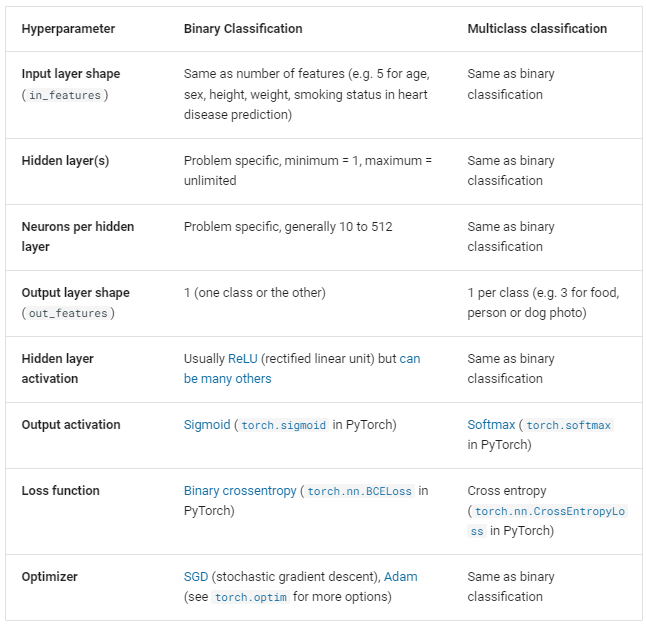


# 02. Neural Netwwork Classification with PyTorch

## Geting our dataset ready

### Make Classification data and get it ready

To start with, we will create our own dataset starting by importing some packages:



In [91]:
import sklearn
from sklearn.datasets import make_circles

# Make a 1000 samples 
n_samples = 1000

#  Create circles
X, y = make_circles(n_samples,
                   noise = 0.03,
                     random_state = 42)   #random state is equivalent to setting up a random seed.

In [92]:
len(X), len(y)

(1000, 1000)

In [93]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n  {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
  [1 1 1 1 0]


In [94]:
# Make a DataFrame of cicle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],  #Renaming each feature in X as X1 or X2
                        "X2":X[:, 1], 
                       "label":y})

In [95]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


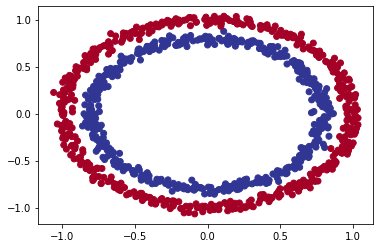

In [96]:
# Visualize the dataset.
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

What we want to do is that given two numbers, we want to predict if it is a red dot or a blue dot. 

Note: that this a toy dataset, a dataset that is small enough to experiment but still sizeable anough to practice the fundamental of neural network classification.

Checkout this link for more information: https://scikit-learn.org/stable/datasets/toy_dataset.html

### Turning our dataset into tensors


#### 1.1 Check inut and output shapes

In [97]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Values for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Values for one sample of X: (2,) and the same for y: ()


In [98]:
####1.2 Turning data into tensors and create a train and test splits
import torch
torch.__version__

'1.13.1+cu116'

In [99]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

The reason why we change it to torch.float is that the default type of numpy is float64 we need to change the conversion of numpy to tensor to its default type and which is float64

In [100]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [101]:
y.dtype, X.dtype, type(X)

(torch.float32, torch.float32, torch.Tensor)

In [102]:
torch.manual_seed(42)

In [103]:
# Split data into trainig and testing set. 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, #0.2 = 20 of testing data and 80% of the training set,
                                                    random_state = 42)

In [104]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [105]:
n_samples

1000

### 2. Building a model


Let's build a model to classify our blue and red dots.

To do so, we want to:

1) Setup device agnostic code so our code will run on an accelerator (GPU) if there is one

2) Construct a model (by subclassing `nn.module`)

3) Define a loss function and optimizer

4) Create a trainig loop and test loop.

#### Setup Agnostic Device 

In [106]:
# Import PyTorch and nn
import torch
from torch import nn


#MAke device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [107]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

#### Construct model


Now we've setup device agnostic code, let's create a model that:

1) Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)

2) Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data.

3) Defines a `forward()` method that outlines the forward pass (or computation) of the model. This is because we are subclassing `nn.module`

4) Instatiate an instance of our model class and send it to the target device.

In [108]:
#2 Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in 2 features and upscales to  features.
    #the reason for upscaling is because the more hidden layers there are the more oppurtunity  our model is to learn more pattern in the data.
    #the in_feature of the second layer must map with the out_feature of the first layer
    self.layer_2 = nn.Linear(in_features=5, out_features=1) #takes in 5 features from previos layer and outputs a single feature (same shape as y)

  #3. Define a forwad() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # x-> layer_1 -> layer_2 -> output
    #our training data goes into layer_1 and perform a linear calculation 
    # and goes into layer_2 and layer 2 into output 

#4. Instantiate an instance of our model class and send it to the target device.
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [109]:
device

'cuda'

In [110]:
next(model_0.parameters()).device #It means model's parameters are on cuda device.

device(type='cuda', index=0)

In [111]:
# Let's replicate the model ablove using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [112]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [113]:
#3 nn.Sequential version of code 2 
# Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_linear_layers = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
    )

  #3. Define a forwad() method that outlines the forward pass
  def forward(self, x):
    return two_linear_layers(x)  # x-> layer_1 -> layer_2 -> output
    #our training data goes into layer_1 and perform a linear calculation 
    # and goes into layer_2 and layer 2 into output 

#4. Instantiate an instance of our model class and send it to the target device.
model_1 = CircleModelV0().to(device)
model_1

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [114]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [115]:
#make some predictions with random numbers

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))   #predict the the label of each X_test value.
print(f"Length of predictions:  {len(untrained_preds)}, shape:  {untrained_preds.shape}")
print(f"length of the test samples: {len(X_test)}, Spape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:  200, shape:  torch.Size([200, 1])
length of the test samples: 200, Spape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again, this is problem specific

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification, you might want to use cross entropy or categorical entropy 
(cross entropy).


As a reminder, the loss function measures how wrong our models predictions are:

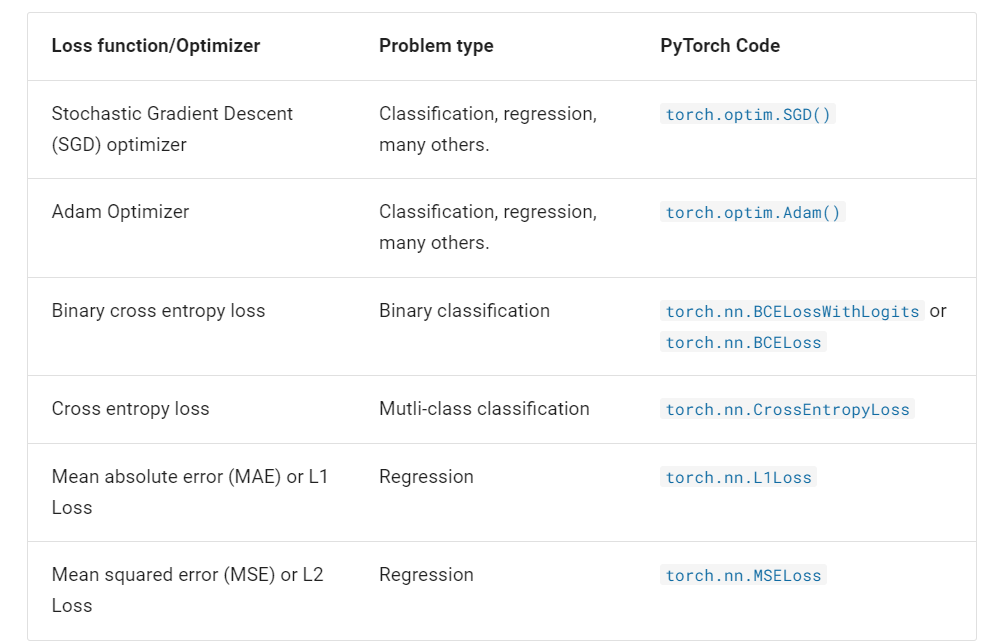

And for optimizers, two of the most common and useful optimizers are SGD and Adam, however PyTorch has man built-in options.

For more information checkout the `torch.optim` documentation:

https://pytorch.org/docs/stable/optim.html


* For the loss function, we're going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, check out this article:

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

* For a definition on what a logit is in deep learning:

https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean



In [116]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss()  # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss.

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [117]:
#Calculate the accuracy - out of 100 examples, what parcentage does our model gets right?
def accuracy_fn(y_true, y_pred):
   correct = torch.eq(y_true, y_pred).sum().item()
   acc = (correct/len(y_pred)) * 100
   return acc

### 3 Train Model

To train our model, we're going to need to build a training loop:

1.  Forward pass
2.  Calculate zero grad
3.  Optimizer zero grad
4.  Loss backward (backpropagation)
5.  Optimizer step (gradient descent)



#### Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw logits.

We can convert these **logits** into **prediction probabilities** by passing them to an activation function (e.g. sigmoid for binary crossentrop and softmax for multiclass classification)


Then we can convert our model's prediction probabilities to **prdiction labels** by either rounding them or taking the argmax().

In [118]:
# View the first  outputs of the forward pass on the test data.
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device ))[:5]  #these are called logits. The logits are raw output of our model

y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [119]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [120]:
#use the sigmoid activation function on our model logits to turn them into prdiction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probabily values, we need to perform a range-style rounding on them:

*  `y_pred_probs` >= 0.5, `y=1`  (class 1)

*  `y_pred_probs` < 0.5, `y=0` (class 0)

In [121]:
#pass y_pred_probs to torch.round to return the output values 
y_preds = torch.round(y_pred_probs)


# In full  (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))


#Check for equality 
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
#torch.round turns the probablities into labels

# Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

###3.2 Building a training and a testing loop

In [122]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Set the number of epochs 
epochs = 100


#Put data to target device 
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#Build our training and evalualtion loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  # turn logits -> pred probs -> pred labels

  #2. Calculate loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss expects prediction probabilities as labels
  #               y_train)
  loss = loss_fn(y_logits,  #nn.BCEWithLogitLoss expects raw logits as input
                 y_train)
  
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (backprogation)
  loss.backward()

  #.  Optimizer step (gradient descent)
  optimizer.step()

  ### Testing 
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2.  Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    
    #Print out what's happening 
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")









  



Epoch: 0 | loss: 0.69796, Acc: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | loss: 0.69590, Acc: 51.25% | Test loss: 0.69305, Test acc: 53.00%
Epoch: 20 | loss: 0.69490, Acc: 51.62% | Test loss: 0.69254, Test acc: 49.50%
Epoch: 30 | loss: 0.69435, Acc: 51.12% | Test loss: 0.69236, Test acc: 49.50%
Epoch: 40 | loss: 0.69401, Acc: 50.88% | Test loss: 0.69232, Test acc: 51.00%
Epoch: 50 | loss: 0.69378, Acc: 50.25% | Test loss: 0.69234, Test acc: 50.00%
Epoch: 60 | loss: 0.69362, Acc: 50.00% | Test loss: 0.69239, Test acc: 51.50%
Epoch: 70 | loss: 0.69351, Acc: 50.25% | Test loss: 0.69246, Test acc: 51.00%
Epoch: 80 | loss: 0.69342, Acc: 49.88% | Test loss: 0.69254, Test acc: 50.00%
Epoch: 90 | loss: 0.69336, Acc: 49.88% | Test loss: 0.69262, Test acc: 53.00%


### 4 . Make predictions and evaluate the model

From th metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, we need to visualize our model.

To do so, we're going to import a function called `plot_decision_boundary()`
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [123]:
import requests 
from pathlib import Path


#Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


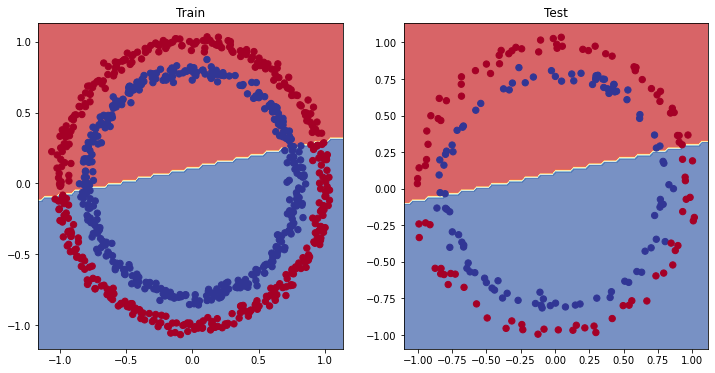

In [124]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

The main thing is tring do is to split our data into two but our data is circular.

###5 Improving a model (from a model perspective)

*  Add more layers - give the model more chanes to learn about patterns in the data 

*  Add more hidden units - go from 5 hidden units to 10 hidden units

* Fit for longer 

* Changing the activation functions

* Change the learning rate 

* Change the the loss function

* Change the optimization function


These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can chnage, the are referred as **hyperparameters**.


Let's try and imporve our modelby: 

* Adding more hiddens units: 5 -> 10
* Increase the number of layers:  2 -> 3
* Increase the number of epochs: 100 - 1000

When doing machine learning experiments, try to change one value at a time and track the changes and this is called **experiment tracking in machine learning**.



In [125]:
class CicleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))  #This way of writing operations leverages speed ups where possible behind the scenes.



model_1 = CicleModelV1().to(device)
model_1



CicleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [126]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

#Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)


In [127]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)


#Train for longer 
epochs = 1000

#Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
  ### Taining
  model_1.train()
  # 1. Forward pass
#1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  # turn logits -> pred probs -> pred labels

  #2. Calculate loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss expects prediction probabilities as labels
  #               y_train)
  loss = loss_fn(y_logits,  #nn.BCEWithLogitLoss expects raw logits as input
                 y_train)
  
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (backprogation)
  loss.backward()

  #.  Optimizer step (gradient descent)
  optimizer.step()

  ### Testing 
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2.  Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    
    #Print out what's happening 
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | loss: 0.69305, Acc: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | loss: 0.69299, Acc: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | loss: 0.69298, Acc: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | loss: 0.69298, Acc: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | loss: 0.69298, Acc: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


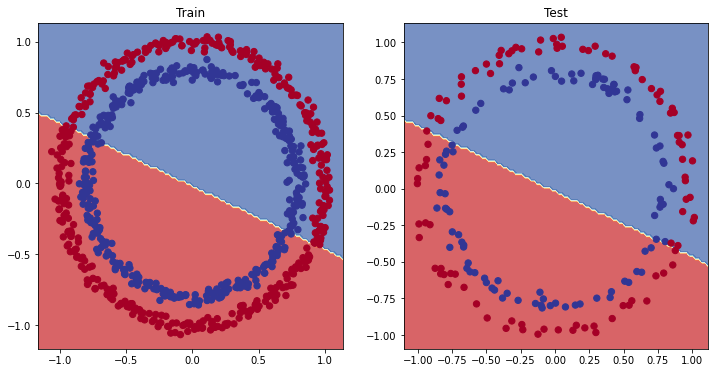

In [128]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Still our model has not learn anything

#### 5.1 Preparing data to see if our model can fit a straigt line.
One way to troubleshoot to a larger problem is to test out a smaller problem.

In [129]:
# Create some data (same as noteboo 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01


#Creta data 
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula


# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [130]:
# Create train and test train_split 
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]


#Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

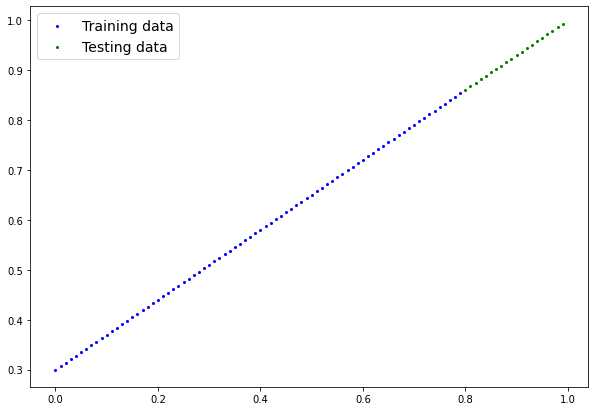

In [131]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

#### Adjusting model_1 to fit a straight line 


In [132]:
# Same architecture as model_1  (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [133]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                            lr=0.01)


In [134]:
#Train the model 
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)


#Train for longer 
epochs = 1000

#Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  ### Taining
  model_2.train()
  # 1. Forward pass
#1. Forward pass
  y_pred = model_2(X_train_regression).squeeze()
  

  #2. Calculate loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits),  # nn.BCELoss expects prediction probabilities as labels
  #               y_train)
  loss = loss_fn(y_pred,  #nn.BCEWithLogitLoss expects raw logits as input
                 y_train_regression)
  
  
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (backprogation)
  loss.backward()

  #.  Optimizer step (gradient descent)
  optimizer.step()

  ### Testing 
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

    #Print out what's happening 
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | loss: {loss:.5f} | Test loss: {test_loss:.5f}")



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([80])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | loss: 0.15113 | Test loss: 0.18803
Epoch: 200 | loss: 0.14384 | Test loss: 0.25466
Epoch: 300 | loss: 0.14137 | Test loss: 0.29286
Epoch: 400 | loss: 0.14049 | Test loss: 0.31569
Epoch: 500 | loss: 0.14017 | Test loss: 0.32920
Epoch: 600 | loss: 0.14006 | Test loss: 0.33740
Epoch: 700 | loss: 0.14001 | Test loss: 0.34265
Epoch: 800 | loss: 0.14000 | Test loss: 0.34522
Epoch: 900 | loss: 0.14000 | Test loss: 0.34557


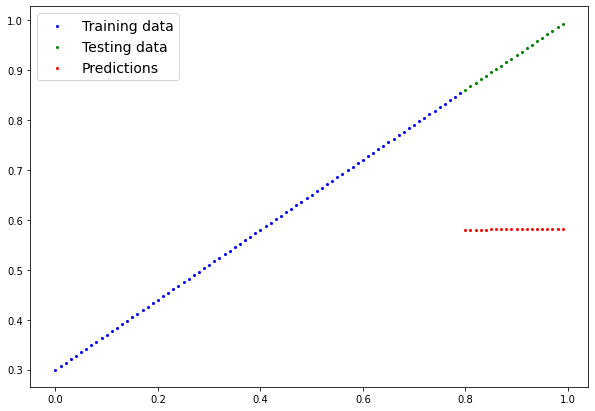

In [135]:
# Turn on evaluation mode
model_2.eval()

#Make predictions (indefernce)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions= y_preds.cpu());

Non-linear Function 

Our model did not work because we only gave it the power to use a linear lines.
We need non-linearity in order to model our datasets.

We supply our inputs and the model figure out what pattern to return in our model.

### 6.  The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-functions?

#### 6.1 Recreating a non-linear data (red and blue circles)



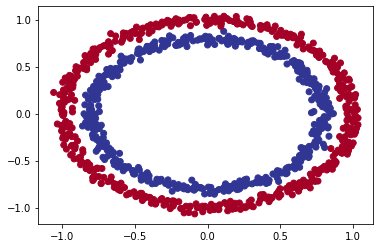

In [136]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 
n_samples = 1000
X, y = make_circles(n_samples,
                      noise = 0.03,
                      random_state=42)
  
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [137]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors 
X = torch.from_numpy(X).type(torch.float)  # convert to tensor from numpy
y = torch.from_numpy(y).type(torch.float)



#Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]), tensor([1., 0., 0., 0., 1.]))

#### 6.2 Building a Model with non-linearity

* Linear = Straight lines

*  Non-linear = non-straight lines


The multiple hidden layers can be any combinations of building blocks of neural network lies in torch.nn

They perform some sort of matheatical operations on the inputs.

When working with non-linear data, we need the power of non-linear functions.

Artificial neural networks are large combinations of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [138]:
# Build a mode with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()   #Introduce the non-linear activation function --> perform operations on numerical input

  def forward(self, x):
    # We will insert non-linear activation function in-between our layers
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2().to(device)   #Instantiate our model
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [139]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

#Create an optimizer 
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)

Other binar problems in existence are:

* Spam or not spam

* Credit cards = fraud or not fraud

* insurance claims = at fault or not at fault


More parameters have do better but it requires more compute to learn patterns.

#### 6.4 Training the model with non-linearization



In [140]:
#Random seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Put all data on target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device),  y_test.to(device)


#Loop through data 
epochs = 1000


for epoch in range(epochs):
  ### training 
  model_3.train()

  #1. Forward pass
  y_logits = model_3(X_train).squeeze()    #train the model on the training data
  y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> prediction probabilities -> prdictions

  #2. Calculate the loss 
  loss = loss_fn(y_logits, y_train)  # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred = y_pred)
  
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward 
  loss.backward()

  #Step the optimizer to improve our model parameters
  optimizer.step()

  ### Testing 
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))


    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred=test_pred)
    

    #Print out what's this happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00%


#### 6.4 Evaluating a model train with non-linear activation function

In [141]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

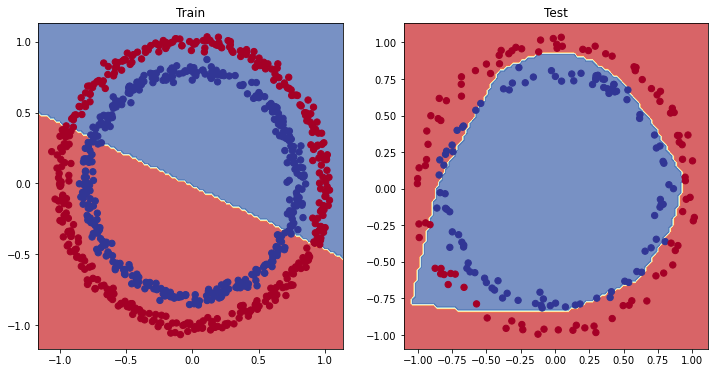

In [142]:
#plot decision boudaries 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

###7 Replicating non-linear activation functions


Neural networks, rather than us telling the model what to learn, we give the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear and non-linear functions

In [143]:
# Create a tensor 
A = torch.arange(-10, 10, 1, dtype= torch.float32)
A.dtype

torch.float32

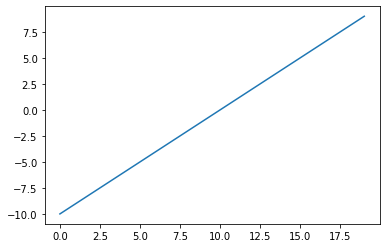

In [144]:
plt.plot(A)

#### 7.1 Replicating Relu function

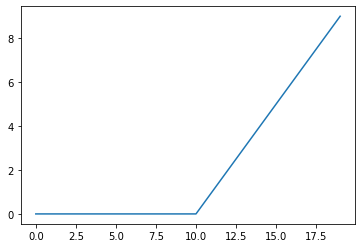

In [145]:
#let's call torch relu on A
plt.plot(torch.relu(A))

In [146]:
#We want ro replicate the relu function.
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)    # inputs must be tensors: the work of the relu function it turns negative input to 0 and leaves all other inputs as they are.
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

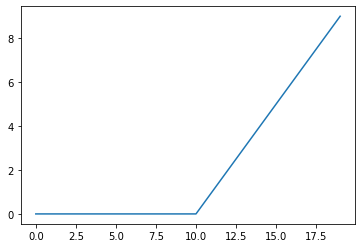

In [147]:
#Plot ReLU activation function
plt.plot(relu(A)) 

####7.2 Replicating the Sigmoid function 
# https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

In [150]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x));
  

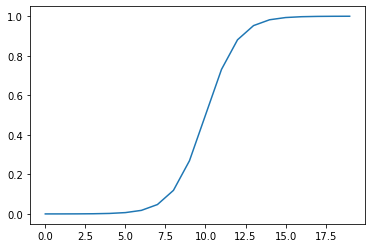

In [151]:
plt.plot(torch.sigmoid(A));